In [ ]:
import networkx as nx

from manim import *

from selma import BACKGROUND
from selma.graph import gvlayout_factory, test_draw, MGraph, rescale_pos
from selma.datastructures import MQueue, MStack

config.background_color = BACKGROUND

layout = gvlayout_factory('neato', heightscale=0.8)

In [ ]:
from visits import SBag, QBag

In [ ]:
def fast_visit(scene, bag, graph, start, wait):
  def highlight(s, turnon):
    color = PURE_GREEN if turnon else BLACK
    ms = graph.mnode(s)
    ms.set(stroke_color=color)
    for t in G.neighbors(s):
      graph.medge(s, t).set_color(color)
    if turnon:
      scene.wait(wait)

  def give(n):
    if n in give.nodes:
      return
    give.nodes.add(n)
    mn = graph.mnode(n)
    mn[0].set_fill(color=GRAY_B, opacity=1)
    mn.set(stroke_color=GRAY_B)
    bag.give(mn.copy())

  give.nodes = set()

  give(start)
  while not bag.is_empty():
    s = bag.peek()
    bag.take()
    highlight(s, True)
    for t in G.neighbors(s):
      give(t)
    highlight(s, False)

In [ ]:
from string import ascii_uppercase

G = nx.erdos_renyi_graph(len(ascii_uppercase), 0.1, directed=True)
G = nx.relabel_nodes(G, lambda n: ascii_uppercase[n])

In [ ]:
G = nx.erdos_renyi_graph(50, 0.1, directed=True)
G = nx.relabel_nodes(G, str)

In [207]:
def sg(G):
  m, am, sm = None, 0, None
  for n in G.nodes():
    sp = nx.shortest_path(G, n)
    if len(sp) > am:
      m, am, sm = n, len(sp), sp
  GG = nx.subgraph(G, set(sm) | {m})
  print(m, GG.number_of_nodes())
  return m, GG

7 31


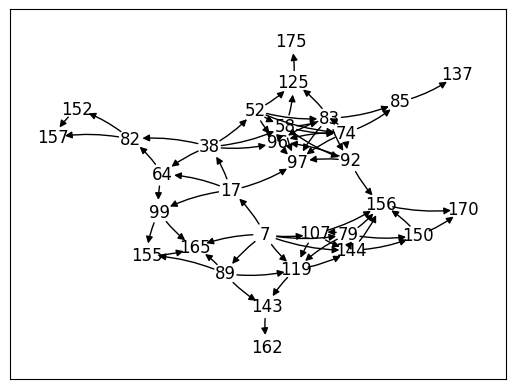

In [208]:
G = nx.random_geometric_graph(180, 0.11, seed=5)
G = nx.DiGraph(G.edges())
G = nx.relabel_nodes(G, str)
m, GG = sg(G)
test_draw(GG, layout)

In [210]:
%%manim --hide-splash -qm -v WARNING Draw

class Draw(Scene):
  def construct(self):
    MG = MGraph(GG, layout, node_scale=.5)
    self.add(MG.mgraph)
    fast_visit(self, SBag(1, 0.6), MG, m, .5)